## Initial Imports for Plotting

In [1]:
#import iris
import numpy as np
import xarray as xr
#import holoviews as hv
#import geoviews as gv
#import geoviews.feature as gf

#from cartopy import crs
#from geoviews import opts

#gv.extension('matplotlib')

#gv.output(size=150)

from bokeh.io import output_notebook

#output_notebook()
#pd.set_option('display.max_columns', 100)
#gv.extension('bokeh')

## Setting Time and URL

In [2]:
dateDesired = str(20010303)
ncFile = 'https://www.ncei.noaa.gov/thredds/dodsC/uv/6h/'+dateDesired[0:4]+'/uv' + dateDesired + '.nc'; 

## Reading Data

In [3]:
import netCDF4
import pandas as pd

nc = netCDF4.Dataset(ncFile, mode='r')

nc.variables.keys()

lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
time_var = nc.variables['time']
dtime = netCDF4.num2date(time_var[:],time_var.units)
u = nc.variables['u'][:]
v = nc.variables['v'][:]


## Writting and Reading the CSV

In [4]:
import xarray as xr

nc = xr.open_dataset(ncFile)
nc.u.to_dataframe().to_csv('u.csv')
nc.v.to_dataframe().to_csv('v.csv')

In [5]:
u_data = pd.read_csv('u.csv')
v_data = pd.read_csv('v.csv')

## Merging the two CSV files into one with NaN removed

In [6]:
import math
import csv

#Open new CSV File
myFile = open('wind.csv', 'w' , newline='')

with myFile:
    #set up headers and write location
    myFields = ['time', 'lat','lon','u','v']
    writer = csv.DictWriter(myFile, fieldnames=myFields)    
    writer.writeheader()
    #Run through length of all data sets
    for i in range(len(u_data)):
        #Assuming time is at 2001-03-03 00:00:00
        if u_data['time'][i] == '2001-03-03 00:00:00' and v_data['time'][i] == '2001-03-03 00:00:00':
            #check for NaN
            if math.isnan(u_data['u'][i]) == False and math.isnan(v_data['v'][i]) == False:
                #Write to CSV
                writer.writerow({'time' : u_data['time'][i], 'lat': u_data['lat'][i], 'lon': u_data['lon'][i], 'u': u_data['u'][i], 'v': v_data['v'][i]})

## Read new CSV

In [7]:
data = pd.read_csv('wind.csv')

## Plot Quivers using Matplotlib

In [8]:
import matplotlib.pyplot as plt

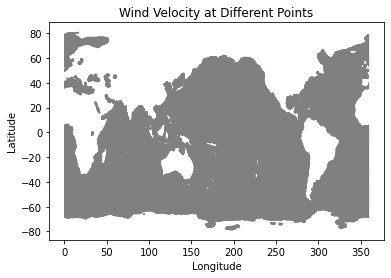

In [9]:
widths = np.linspace(0, 2, data['lon'].size)
plt.quiver(data['lon'], data['lat'],data['u'],data['v'], linewidths=widths, color = '0.5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Wind Velocity at Different Points')
plt.show()

There is technically quivers on this map, but they are so small and there are so many, that it is impossible to tell.